In [94]:
# Standard import(s)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import random as rn
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing # Import preprocessing for String-Int conversion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [96]:
# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Embedding, GlobalAveragePooling1D,Conv1D,MaxPool1D,Dropout, Bidirectional ,UpSampling1D, SimpleRNN,LSTM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [97]:
#self-embedded

In [98]:
#add callbacks and roc curve

# INBUILT KERAS EMBEDDING

In [99]:
# convert phrases to numerical representation: bag of words
phrase_data = pd.read_pickle("clean_phrase_data4.pkl") 
labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

#split phrase datasets to x and y
X = phrase_data["feature"].copy()
y = phrase_data["label"].copy()


In [105]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# cut off reviews after x words
max_len = 100 #(len(max(X, key=len)))
# consider only the top 10000 words
max_words = 10000 

# import tokenizer with the consideration for only the top 500 words
tokenizer = Tokenizer(num_words=max_words) 

# fit the tokenizer on the texts
tokenizer.fit_on_texts(X) 

# convert the texts to sequences
sequences = tokenizer.texts_to_sequences(X) 

word_index = tokenizer.word_index
print('Found %s unique tokens. ' % len(word_index))

 # pad the sequence to the required length to ensure uniformity
data = pad_sequences(sequences, maxlen=max_len)
print('Data Shape: {}'.format(data.shape))


print("Shape of data tensor: ", data.shape)


Found 17738 unique tokens. 
Data Shape: (152018, 100)
Shape of data tensor:  (152018, 100)


In [106]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(x_train.shape,x_test.shape,y_train.ravel().shape)
shape = x_train.shape[1]
xshape = x_train.shape[0]

(106412, 100) (45606, 100) (106412,)


## Multi-layer Perceptron (Dense Neural Network) model 

In [107]:
inputs = Input(shape=(100,))
embedding = Embedding(input_dim=xshape, output_dim=5, input_length = shape)(inputs)
flat = Flatten()(embedding)
encoded_h1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(flat)
encoded_h2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoded_h1)
drop = Dropout(0.25)(encoded_h2)
encoded_h3 = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h3)
encoded_h4 = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop)
drop = Dropout(0.25)(encoded_h4)
output = Dense(len(labels),activation='softmax')(drop)
dense_keremb = Model(inputs,output)

dense_keremb.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 100, 5)            532060    
_________________________________________________________________
flatten_7 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               64128     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                208

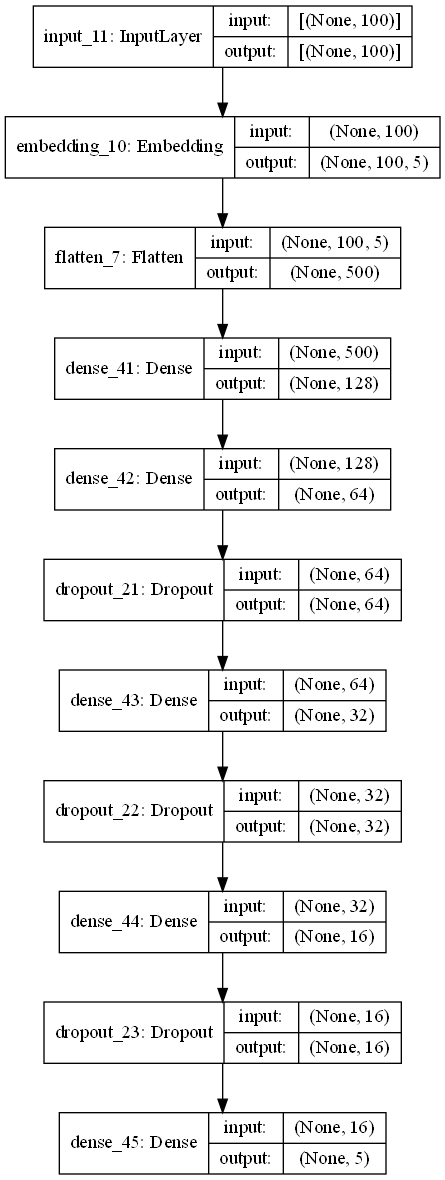

In [108]:
plot_model(dense_keremb, show_shapes=True)

In [109]:
dense_keremb.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

dense_kemb = dense_keremb.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/20
85129/85129 [==============================] - 8s 94us/sample - loss: 1.3290 - acc: 0.4587 - val_loss: 1.2601 - val_acc: 0.4777
Epoch 2/20
85129/85129 [==============================] - 7s 87us/sample - loss: 1.2412 - acc: 0.4887 - val_loss: 1.2455 - val_acc: 0.4893oss: 1.2421 - ETA: 2s - loss - ETA: 1s - loss:  - ETA: 0s - loss: 1.2417 - acc:
Epoch 3/20
85129/85129 [==============================] - 7s 87us/sample - loss: 1.2077 - acc: 0.5032 - val_loss: 1.2310 - val_acc: 0.4995
Epoch 4/20
85129/85129 [==============================] - 7s 84us/sample - loss: 1.1687 - acc: 0.5171 - val_loss: 1.1967 - val_acc: 0.5049
Epoch 5/20
85129/85129 [==============================] - 7s 86us/sample - loss: 1.1049 - acc: 0.5438 - val_loss: 1.1504 - val_acc: 0.5357 - ETA: 0s - loss: 1.10
Epoch 6/20
85129/85129 [==============================] - 8s 92us/sample - loss: 1.0311 - acc: 0.5790 - val_loss: 1.1097 - val_acc: 0.5393 0s - loss: 1.0

106412/106412 [==============================] - 2s 19us/sample - loss: 0.8953 - acc: 0.6296
Overall accuracy for training dataset: 62.95812726020813%
Overall accuracy for testing dataset: 51.471298933029175%


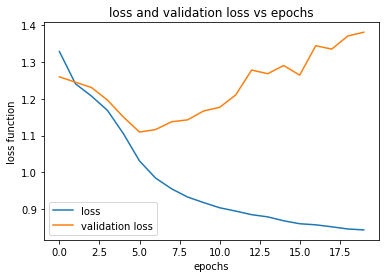

In [110]:
misc,testacc = dense_keremb.evaluate(x_test,y_test)
misc,trainacc = dense_keremb.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(dense_kemb.history['loss'],label="loss")
plt.plot(dense_kemb.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

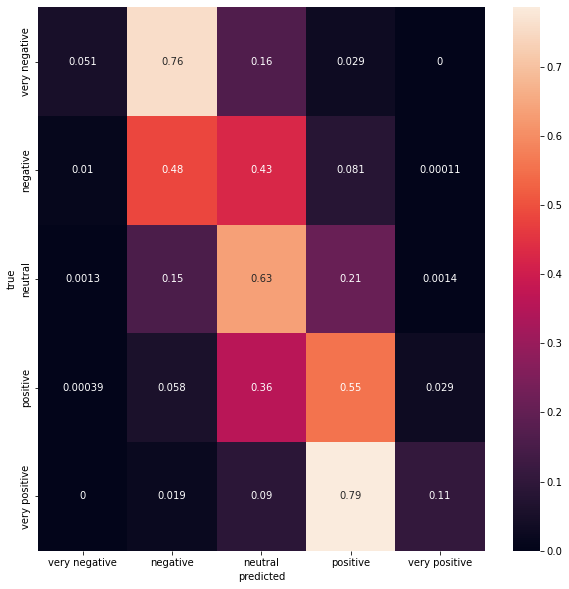

In [111]:
predicted = dense_keremb.predict(x_test)
matrix = confusion_matrix(y_test,predicted.argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  RNN (Recurrent Neural Network)

In [112]:
inputs = Input(shape=(100,))
embedding = Embedding(input_dim=xshape, output_dim=5, input_length = shape)(inputs)
bi = Bidirectional(SimpleRNN(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
rnn_keremb = Model(inputs,output)

rnn_keremb.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 100, 5)            532060    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               5600      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_47 (Dense)             (None, 5)                 325       
Total params: 544,449
Trainable params: 544,449
Non-trainable params: 0
_________________________________________________________________


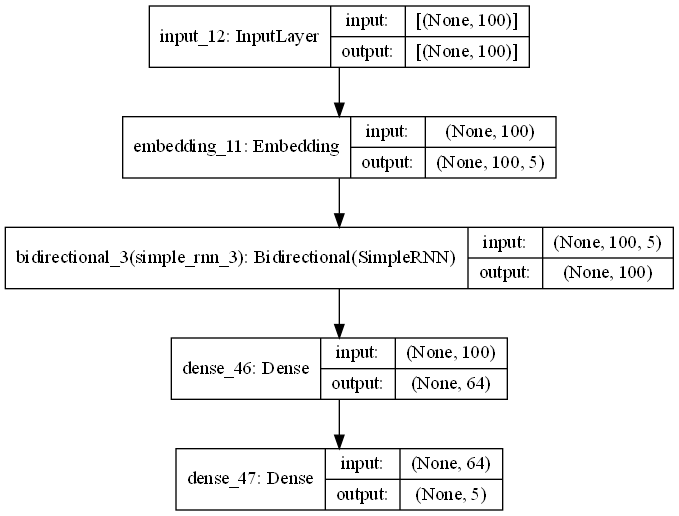

In [113]:
plot_model(rnn_keremb, show_shapes=True)

In [114]:
rnn_keremb.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

rnn_kemb = rnn_keremb.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/20
85129/85129 [==============================] - 31s 364us/sample - loss: 1.2804 - acc: 0.4671 - val_loss: 1.1442 - val_acc: 0.5264
Epoch 2/20
85129/85129 [==============================] - 31s 361us/sample - loss: 1.0543 - acc: 0.5574 - val_loss: 1.0654 - val_acc: 0.5451
Epoch 3/20
85129/85129 [==============================] - 33s 383us/sample - loss: 0.9820 - acc: 0.5824 - val_loss: 1.0527 - val_acc: 0.5553
Epoch 4/20
85129/85129 [==============================] - 31s 367us/sample - loss: 0.9588 - acc: 0.5894 - val_loss: 1.0479 - val_acc: 0.5557
Epoch 5/20
85129/85129 [==============================] - 32s 379us/sample - loss: 0.9298 - acc: 0.6008 - val_loss: 1.0606 - val_acc: 0.5565
Epoch 6/20
85129/85129 [==============================] - 34s 396us/sample - loss: 0.9282 - acc: 0.5985 - val_loss: 1.0658 - val_acc: 0.5477
Epoch 7/20
85129/85129 [==============================] - 33s 386us/sample - loss: 0.8950 - acc: 0.6121 

106412/106412 [==============================] - 19s 179us/sample - loss: 0.8358 - acc: 0.6452
Overall accuracy for training dataset: 64.52186107635498%
Overall accuracy for testing dataset: 50.890231132507324%


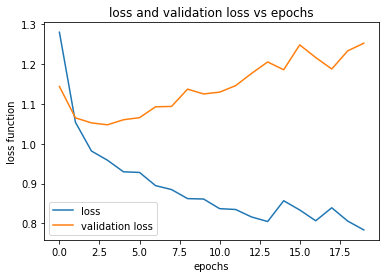

In [115]:
misc,testacc = rnn_keremb.evaluate(x_test,y_test)
misc,trainacc = rnn_keremb.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(rnn_kemb.history['loss'],label="loss")
plt.plot(rnn_kemb.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

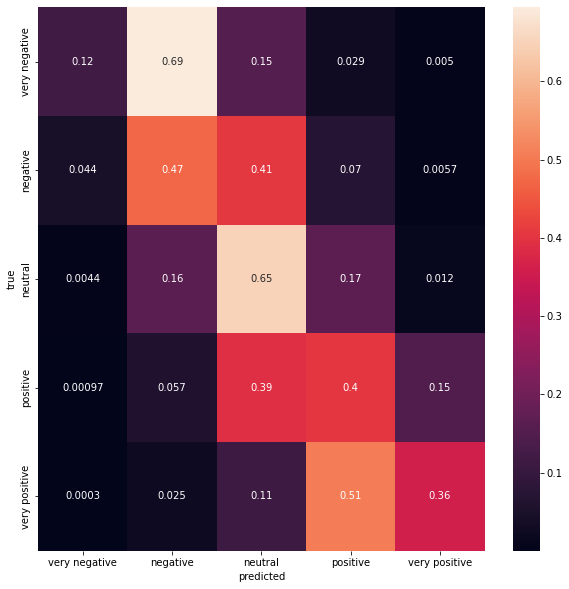

In [116]:
predicted = rnn_keremb.predict(x_test)
matrix = confusion_matrix(y_test,predicted.argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

#  LSTM (Long Short-Term Memory)

In [118]:
inputs = Input(shape=(100,))
embedding = Embedding(input_dim=xshape, output_dim=5, input_length = shape)(inputs)
bi = Bidirectional(LSTM(50))(embedding)
dense1 = Dense(64, activation='relu')(bi)
output = Dense(len(labels),activation='softmax')(dense1)
ltsm_keremb = Model(inputs,output)

ltsm_keremb.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 100, 5)            532060    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100)               22400     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 325       
Total params: 561,249
Trainable params: 561,249
Non-trainable params: 0
_________________________________________________________________


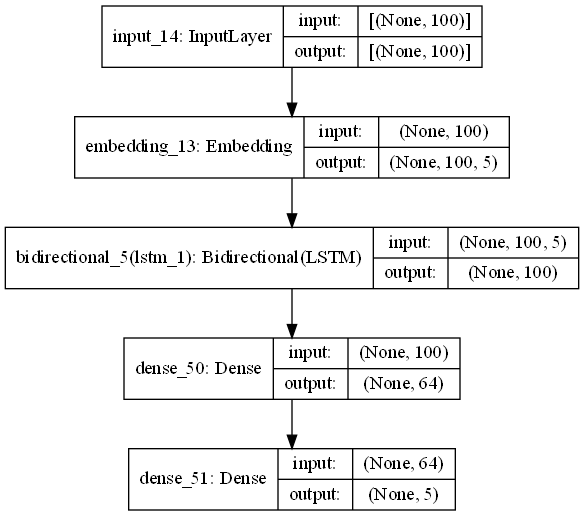

In [120]:
plot_model(ltsm_keremb, show_shapes=True)

In [121]:
ltsm_keremb.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

lstm_kemb = ltsm_keremb.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
85129/85129 [==============================] - 93s 1ms/sample - loss: 1.2484 - acc: 0.4840 - val_loss: 1.1436 - val_acc: 0.5288
Epoch 2/20
85129/85129 [==============================] - 100s 1ms/sample - loss: 1.0420 - acc: 0.5604 - val_loss: 1.0429 - val_acc: 0.5572
Epoch 3/20
85129/85129 [==============================] - 92s 1ms/sample - loss: 0.9721 - acc: 0.5854 - val_loss: 1.0397 - val_acc: 0.5575
Epoch 4/20
85129/85129 [==============================] - 85s 998us/sample - loss: 0.9450 - acc: 0.5942 - val_loss: 1.0345 - val_acc: 0.5633
Epoch 5/20
85129/85129 [==============================] - 90s 1ms/sample - loss: 0.9292 - acc: 0.5980 - val_loss: 1.0419 - val_acc: 0.5596
Epoch 6/20
85129/85129 [==============================] - 86s 1ms/sample - loss: 0.9172 - acc: 0.6010 - val_loss: 1.0439 - val_acc: 0.5549
Epoch 7/20
85129/85

106412/106412 [==============================] - 40s 376us/sample - loss: 0.8255 - acc: 0.6529
Overall accuracy for training dataset: 65.28962850570679%
Overall accuracy for testing dataset: 51.041531562805176%


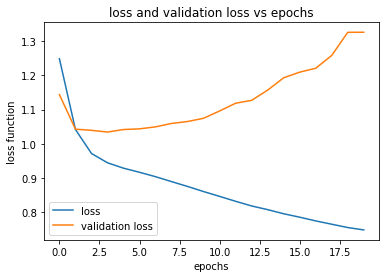

In [123]:
misc,testacc = ltsm_keremb.evaluate(x_test,y_test)
misc,trainacc = ltsm_keremb.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(lstm_kemb.history['loss'],label="loss")
plt.plot(lstm_kemb.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

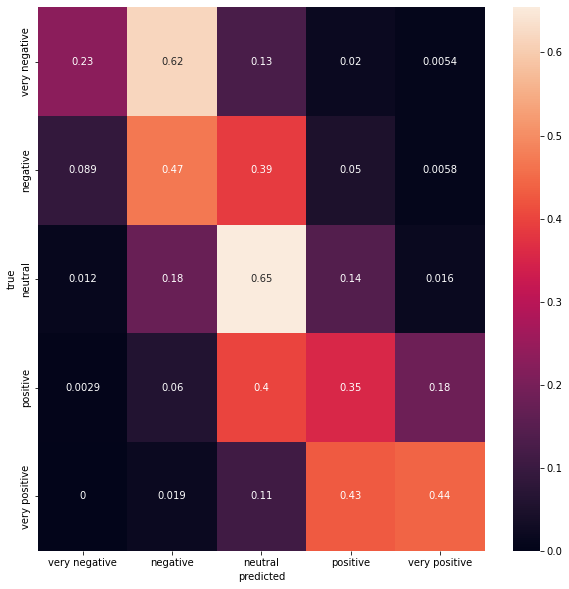

In [124]:
matrix = confusion_matrix(y_test,ltsm_keremb.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

# Convolutional NN

In [125]:
inputs = Input(shape=(100,))
embedding = Embedding(input_dim=xshape, output_dim=5, input_length = shape)(inputs)
encoded_h1 = Conv1D(50,kernel_size=3, activation='relu')(embedding)
pool1 = MaxPool1D(pool_size=2)(encoded_h1)
encoded_h2 = Conv1D(40,kernel_size=3, activation='relu')(pool1)
pool2 = MaxPool1D(pool_size=2)(encoded_h2)
encoded_h3 = Conv1D(30,kernel_size=3, activation='relu')(pool2)
pool3 = MaxPool1D(pool_size=2)(encoded_h3)
flat = Flatten()(pool3)
data = Dense(20, activation='relu')(flat)
drop = Dropout(0.5)(data)
output = Dense(len(labels),activation='softmax')(drop)
cnn_keremb = Model(inputs,output)

cnn_keremb.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 100, 5)            532060    
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 50)            800       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 50)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 47, 40)            6040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 40)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 30)            363

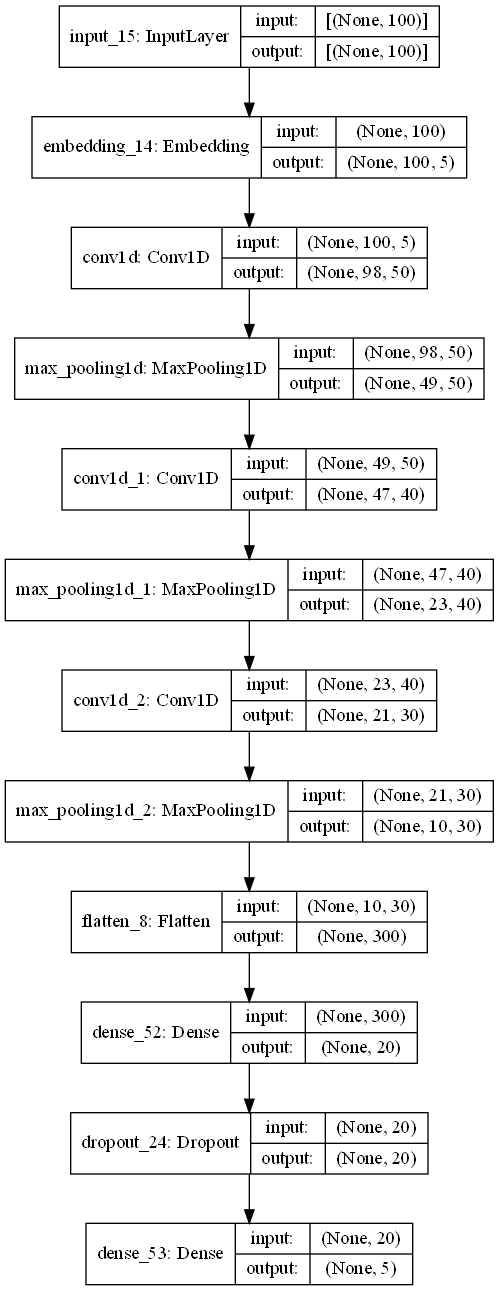

In [126]:
plot_model(cnn_keremb, show_shapes=True)

In [127]:
cnn_keremb.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn_kemb = cnn_keremb.fit(x_train,y_train,epochs=20,batch_size=64, validation_split=0.2)

Train on 85129 samples, validate on 21283 samples
Epoch 1/20
85129/85129 [==============================] - 15s 177us/sample - loss: 1.3809 - acc: 0.4537 - val_loss: 1.3412 - val_acc: 0.4530
Epoch 2/20
85129/85129 [==============================] - 15s 172us/sample - loss: 1.3451 - acc: 0.4581 - val_loss: 1.3387 - val_acc: 0.4543
Epoch 3/20
85129/85129 [==============================] - 15s 173us/sample - loss: 1.3343 - acc: 0.4628 - val_loss: 1.3375 - val_acc: 0.4562
Epoch 4/20
85129/85129 [==============================] - 21s 244us/sample - loss: 1.3257 - acc: 0.4675 - val_loss: 1.3398 - val_acc: 0.4552
Epoch 5/20
85129/85129 [==============================] - 22s 264us/sample - loss: 1.3167 - acc: 0.4712 - val_loss: 1.3460 - val_acc: 0.4558
Epoch 6/20
85129/85129 [==============================] - 25s 294us/sample - loss: 1.3112 - acc: 0.4747 - val_loss: 1.3567 - val_acc: 0.4548
Epoch 7/20
85129/85129 [==============================] - 26s 303us/sample - loss: 1.3054 - acc: 0.4770 

106412/106412 [==============================] - 19s 178us/sample - loss: 1.3680 - acc: 0.5041
Overall accuracy for training dataset: 50.41348934173584%
Overall accuracy for testing dataset: 45.66065967082977%


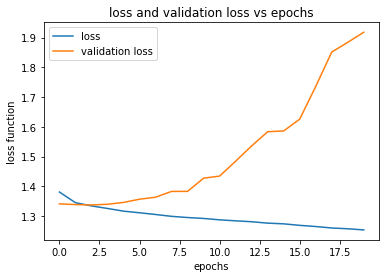

In [128]:
misc,testacc = cnn_keremb.evaluate(x_test,y_test)
misc,trainacc = cnn_keremb.evaluate(x_train,y_train)

print("Overall accuracy for training dataset: "+ str(trainacc*100) +"%")
print("Overall accuracy for testing dataset: "+ str(testacc*100) + "%")

plt.plot(cnn_kemb.history['loss'],label="loss")
plt.plot(cnn_kemb.history['val_loss'],label="validation loss")
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend()
plt.show()

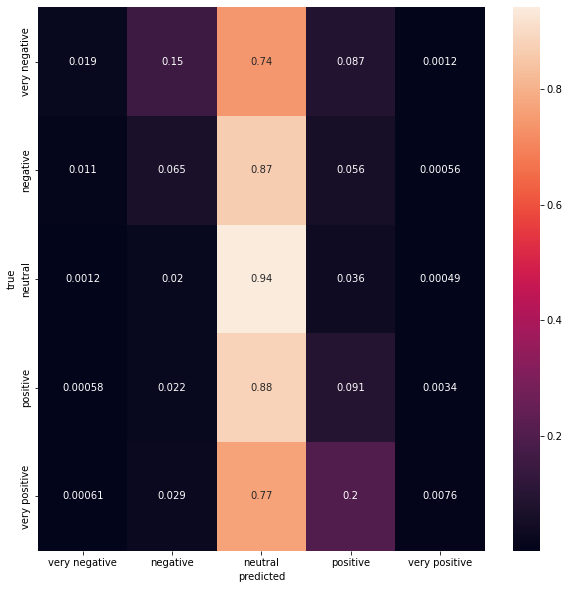

In [129]:
matrix = confusion_matrix(y_test,cnn_keremb.predict(x_test).argmax(axis=-1), normalize='true')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, annot=True) 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
plt.show()

In [ ]:
##### evaluate

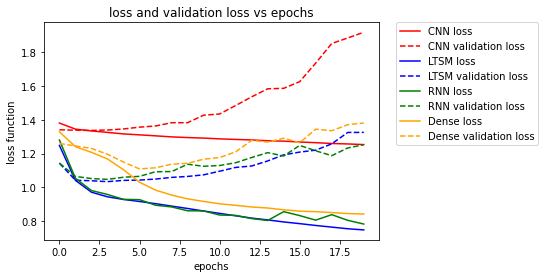

In [131]:
plt.plot(cnn_kemb.history['loss'], label="CNN loss", color = 'red')
plt.plot(cnn_kemb.history['val_loss'],'--',label="CNN validation loss", color = 'red')
plt.plot(lstm_kemb.history['loss'],label="LTSM loss", color = 'blue')
plt.plot(lstm_kemb.history['val_loss'],'--',label="LTSM validation loss",color = 'blue')
plt.plot(rnn_kemb.history['loss'],label="RNN loss", color = 'green')
plt.plot(rnn_kemb.history['val_loss'],'--',label="RNN validation loss",color = 'green')
plt.plot(dense_kemb.history['loss'],label="Dense loss",color = 'orange')
plt.plot(dense_kemb.history['val_loss'],'--',label="Dense validation loss",color = 'orange')
plt.title('loss and validation loss vs epochs')
plt.ylabel('loss function')
plt.xlabel('epochs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()